# Assignment 0
## Author: Xintong Zhao
### Date: Sep 20th 2018
---

In [1]:
#load packages and dataset first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

df = pd.read_csv('~/Hitters.csv')

In [2]:
#clean dataset first, try to reomve all rows that have empty values
df = df.dropna()
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


---
## 1 Regularization.
### 1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). 
#### 1.1.1. Create a visualization of the coefficient trajectories

In order to exclude categorical predictors, we need to know types of all predictors first. Then we perform the following:

In [3]:
df.dtypes

Unnamed: 0     object
AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
League         object
Division       object
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
NewLeague      object
dtype: object

From the output above, we can see that Unnamed: 0(which is actually names), League, Division and NewLeague are categorical. Thus, we exclude them from predictors.

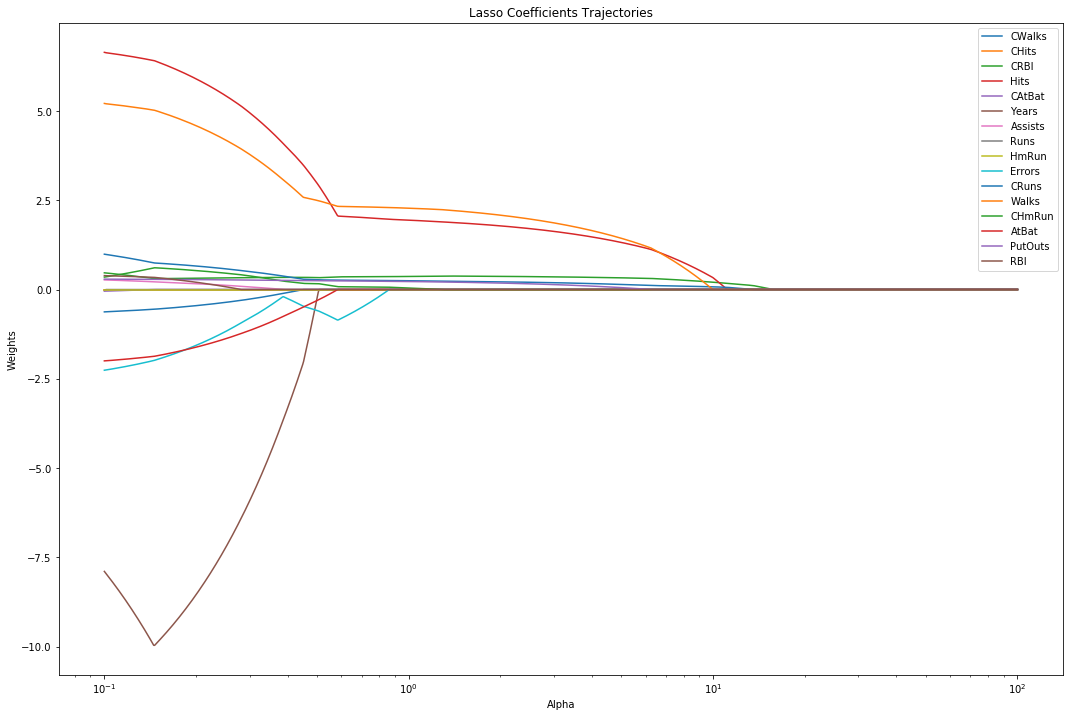

In [39]:
#reference: 
#https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

#define list of predictors first: all columns - target column - categorial columns
predictors = list(set(list(df))-set(['League','Division','NewLeague','Unnamed: 0','Salary']))

#define a function that returns coefficients on each alpha value
def lasso_reg(df, predictors, alpha):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e4)
    lassoreg.fit(df[predictors],df['Salary'])
    #y_pred = lassoreg.predict(df[predictors])
    return lassoreg.coef_

#define a function for visualization
def visual():
    #assign a space to store results later
    coefs = []
    #define a range of alpha
    alpha = np.logspace(-1, 2, 1000)
    for i in alpha:
        coefs+=[lasso_reg(df,predictors,i)]
    
    #now we visualize coefficients trajectories with different alphas
    #set fig size, take the second element in subplots tuple
    ax = plt.subplots(figsize=(18, 12))[1]
    #plug in values
    plt.plot(alpha, coefs)
    ax.set_xscale('log')
    #set axis names
    plt.xlabel('Alpha')
    plt.ylabel('Weights')
    #legend
    plt.legend(predictors)
    #give it a title
    plt.title('Lasso Coefficients Trajectories')
    
visual()
    

#### 1.1.2. Comment on which are the final three predictors that remain in the model

In [51]:
#now we just take the regression of alpha = 10, and see the values of coefficients
lassoreg = Lasso(alpha=10,normalize=True, max_iter=1e4)
#fit the model again
lassoreg.fit(df[predictors],df['Salary'])

coefs = list(lassoreg.coef_)
print("All coefficient values are shown below:\n",coefs)


All coefficient values are shown below:
 [0.0, 0.0, 0.20479443543579923, 0.3295605033066379, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07600671725544086, 0.0, 0.0, 0.0, 0.0, 0.0]


In [69]:
#Now find the 3 predictors remained in model
name = predictors
idx = [i for i in coefs if i!=0]
idx = [coefs.index(i) for i in idx]
print("Based on the coefficients shown above, there are %d non-zero coefficients.\n"%(len(idx)))

#align 3 coefficients on one line
s = ""
for i in idx:
    s+=name[i]+' '
#output coefficient names
print("These 3 coefficients are: "+s)

Based on the coefficients shown above, there are 3 non-zero coefficients.

These 3 coefficients are: CRBI Hits CRuns 


As shown above, the 3 non-zero coefficients when alpha = 10 is: **CRBI, Hits and CRuns**. 

#### 1.1.3. Use cross-validation to find the optimal value of the regularization penalty

In [75]:
#10 fold cv for optimal alpha
#set cv = 10
lassocv = LassoCV(max_iter = 1e5, normalize = True, cv = 10)
#fit cv
lassocv.fit(df[predictors],df['Salary'])
#return optimal alpha value
optimal_al = lassocv.alpha_
#print it out
print("The optimal alpha value is:",optimal_al)

The optimal alpha value is: 0.0635481759985745


Thus, we can see that the optimal value of the regularization penalty (which is optimized alpha value) is 0.0635481759985745.

#### 1.1.4. How many predictors are left in that model?

In [79]:
lassoreg = Lasso(alpha=optimal_al,normalize=True, max_iter=1e4)
lassoreg.fit(df[predictors],df['Salary'])
y_pred = lassoreg.predict(df[predictors])
sol = pd.DataFrame()
sol['predictor'] = df[predictors].columns
sol['coef'] = list(lassoreg.coef_)
#all coefficient values 
print(sol)
print("\nAs shown above, there are %d coefficients left."%(len([j for j in list(lassoreg.coef_) if j!=0])))

   predictor      coef
0     CWalks -0.691548
1      CHits  0.000000
2       CRBI  0.580224
3       Hits  7.042616
4     CAtBat -0.086507
5      Years -6.128466
6    Assists  0.304380
7       Runs -0.682795
8      HmRun  0.000000
9     Errors -2.451509
10     CRuns  1.227110
11     Walks  5.515909
12    CHmRun  0.163387
13     AtBat -2.084227
14   PutOuts  0.292756
15       RBI  0.498543

As shown above, there are 14 coefficients left.


---
### 1.2 Repeat with Ridge Regression. 

#### 1.2.1 Visualize the coefficient trajectories

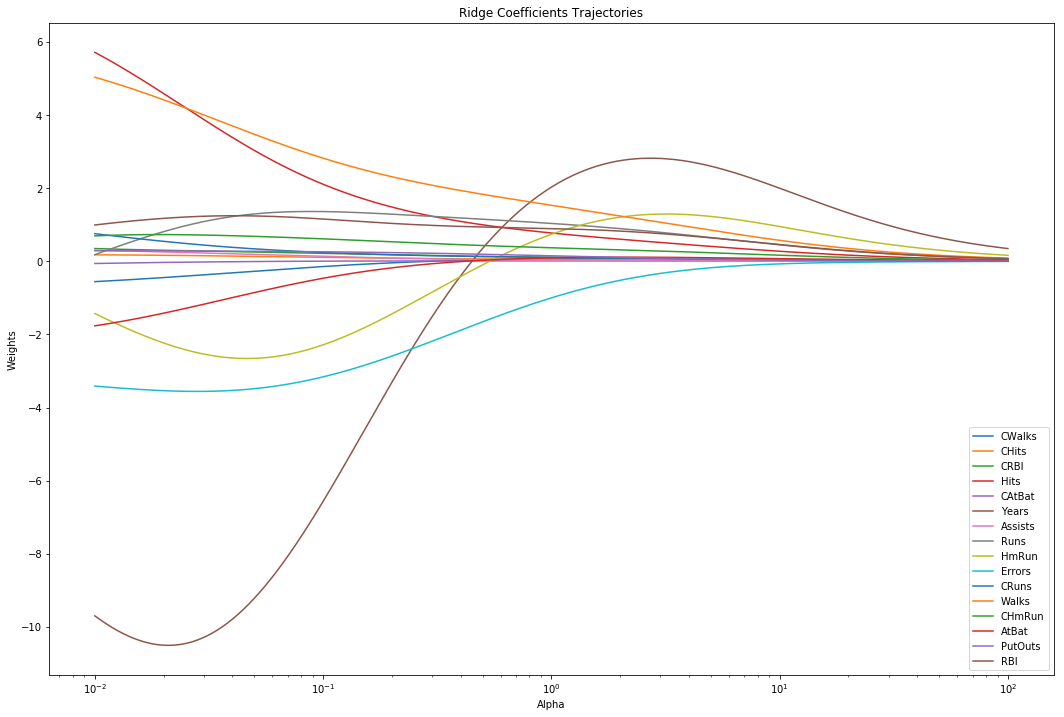

In [82]:
#Used the same reference link as shown in question 1
#Same idea from question 1

#set the set of predictors first
predictors = list(set(list(df))-set(['League','Division','NewLeague','Unnamed: 0','Salary']))

def ridge_reg(data, predictors, alpha):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['Salary'])
    #y_pred = ridgereg.predict(data[predictors])
    return ridgereg.coef_


#define a function for visualization
def visual():
    #assign a space to store results later
    coefs = []
    #define a range of alpha
    alpha = np.logspace(-2, 2, 1000)
    for i in alpha:
        coefs+=[ridge_reg(df,predictors,i)]
    
    #now we visualize coefficients trajectories with different alphas
    #set fig size, take the second element in subplots tuple
    ax = plt.subplots(figsize=(18, 12))[1]
    #plug in values
    plt.plot(alpha, coefs)
    ax.set_xscale('log')
    #set axis names
    plt.xlabel('Alpha')
    plt.ylabel('Weights')
    #legend
    plt.legend(predictors)
    #give it a title
    plt.title('Ridge Coefficients Trajectories')
    
visual()

#### 1.2.2 Use cross-validation to find the optimal value of the regularization penalty

In [88]:
#10 fold cv for optimal alpha
#set cv = 10
ridgecv = RidgeCV(alphas = np.logspace(-2, 2, 1000),normalize = True, cv = 10)
#fit cv
ridgecv.fit(df[predictors],df['Salary'])
#return optimal alpha value
optimal_rid = ridgecv.alpha_
#print it out
print("The optimal alpha value is:",optimal_rid)

The optimal alpha value is: 0.9772146969725725


---
## 2. Short Answer.

### 2.1 Explain in your own words the bias-variance tradeoff

Bias-variance tradeoff is a property related with statistical modeling/machine learning. It means that when the bias of parameter estimation is low, the variance of parameter estimation is high, and vice versa. The problem occurs while people are trying to reduce both bias and variance across the sample at the same time, and practically we found that it is not feasible.  

### 2.2 What role does regularization play in this tradeoff? 

In both ridge and lasso regression, regularization penalty parameter exists (which is alpha). When alpha is large, it is most likely that there are more restrictions on coefficients. Namely, if coefficients want to be large, then they need to pay more penalty. In this case, coefficients tend to be small. In extreme case, when the alpha is infinite, then the coefficients will all become 0 in lasso regression and infinitely close to 0 in ridge regression.<br>
In conclusion, alpha can solve the problem of over-fitting, but it will also increase bias.

### 2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance

As you can see in question 1.1.1, in the visualization, when the alpha value is negative or close to 0, then the coefficients' values are large. However, when alpha is getting larger, the values of coefficients get smaller and smaller, some of them even becomes 0. The bias is getting larger when alpha is larger, and the variance is smaller.

---
# End of Assignment